In [1]:
#}!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette('muted')

In [2]:
Ulim_dict = {'Fe': {'TCPP': 0.688, 'none': 0.706, 'Fe-OH': 0.71, 'Cr-OH': 0.655, 'Mn-OH': 0.611}, 
             'Mn-OH': {'TCPP': 0.738, 'none': 0.697, 'Fe-OH': 0.606, 'Cr-OH': 0.661, 'Mn-OH': 0.659}, 
             'Cr-OH': {'TCPP': 0.749, 'none': 0.787, 'Fe-OH': 1.069, 'Cr-OH': 0.934, 'Mn-OH': 0.745}, 
             'Co': {'TCPP': 0.525, 'none': 0.593, 'Fe-OH': 0.808, 'Cr-OH': 0.648, 'Mn-OH': 0.55}, 
             'Fe-OH': {'TCPP': 0.609, 'none': 0.732, 'Fe-OH': 0.754, 'Cr-OH': 0.406, 'Mn-OH': 0.286}, 
             'Ni': {'TCPP': 0.058, 'none': 0.131, 'Fe-OH': 0.373, 'Cr-OH': 0.168, 'Mn-OH': -0.137}}

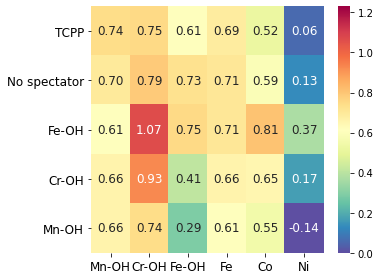

In [3]:
specs = ['TCPP', 'none', 'Fe-OH', 'Cr-OH', 'Mn-OH']
active = ['Mn-OH', 'Cr-OH', 'Fe-OH', 'Fe', 'Co', 'Ni']

ulim = np.zeros((len(specs), len(active)))

for i in range(len(active)):
    for j in range(len(specs)):
        ulim[j, i] = np.round(Ulim_dict[active[i]][specs[j]], 2)

specs[1] = 'No spectator'

fig, ax = plt.subplots(figsize=(5.5,4.0))#, constrained_layout=True)
sns.heatmap(ulim, vmin=0, vmax=1.23, annot=True, annot_kws={'fontsize': 12}, fmt='.2f', xticklabels=active, yticklabels=specs, cmap='Spectral_r')
plt.yticks(rotation='horizontal')
plt.tick_params(labelsize=12)
plt.title('')
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

In [8]:
df = pd.read_csv('data/model_results.csv')
df

,Model,Accuracy,Precision,Recall,F1,AUC
0,LR-SGD,0.9167,0.9615,0.8621,0.9091,0.9354
1,SVG-SGD,0.9375,0.9391,0.9310,0.9351,0.9847
2,DT,0.9292,0.9304,0.9224,0.9264,0.9340
3,LDA,0.7417,0.7872,0.6379,0.7048,0.7852
4,RF,0.9292,0.9304,0.9224,0.9264,0.9903
5,XGBoost,0.9375,0.9316,0.9397,0.9356,0.9897


In [18]:
df.index = df['Model']

In [19]:
df_model_index = df.drop(columns='Model')
#df_model_index["Converged"] = 1
#df_model_index["Converged2"] = 1

In [20]:
df_model_index

,Accuracy,Precision,Recall,F1,AUC
Model,,,,,
LR-SGD,0.9167,0.9615,0.8621,0.9091,0.9354
SVG-SGD,0.9375,0.9391,0.9310,0.9351,0.9847
DT,0.9292,0.9304,0.9224,0.9264,0.9340
LDA,0.7417,0.7872,0.6379,0.7048,0.7852
RF,0.9292,0.9304,0.9224,0.9264,0.9903
XGBoost,0.9375,0.9316,0.9397,0.9356,0.9897


In [37]:
sns.diverging_palette(220, 20, as_cmap=True)

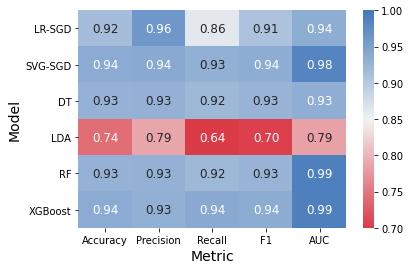

In [65]:
cp = sns.diverging_palette(10, 250, as_cmap=True) #sns.color_palette("coolwarm")# , as_cmap=True)
sns.heatmap(df_model_index, vmin=0.7, vmax=1, annot=True, annot_kws={'fontsize': 12}, fmt='.2f', cmap=cp)
plt.xlabel("Metric", fontsize =14)
plt.ylabel("Model", fontsize=14)
plt.savefig('../model_matrix.svg')
